In [1]:
# IMPORTS
import math
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sbn
import datetime as dt
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

In [7]:
# LOAD DATA
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
COINS = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'AVAX-USD', 'SHIB-USD', 'DAI-USD']
prices = yf.download(COINS, start)
returns = np.log(1+ prices['Adj Close'].pct_change()).dropna()
prices, returns = prices['Adj Close'].to_numpy(), returns.to_numpy()
print(prices.shape)
print(returns)

[*********************100%***********************]  8 of 8 completed
(845, 8)
[[-4.15520672e-02 -6.15891548e-02 -2.78866219e-02 ...             inf
   7.06431101e-04  1.46558241e-03]
 [-3.68717632e-02  1.97875626e-02 -1.45429261e-02 ...  6.93147181e-01
   9.40890415e-03  9.12185653e-03]
 [-1.60367847e-01 -7.86914750e-02 -7.64724311e-02 ...  0.00000000e+00
  -1.03463142e-02 -1.13601322e-02]
 ...
 [-1.28387172e-02  4.84247924e-03 -1.96110853e-02 ...  0.00000000e+00
  -8.30688964e-05  7.69941485e-05]
 [-1.63622417e-02 -1.31953156e-02 -6.40161933e-03 ...  0.00000000e+00
  -1.94887407e-04 -5.95908776e-06]
 [-3.83983659e-02 -2.10417892e-02 -1.15716468e-02 ... -2.87501936e-02
  -1.62792875e-04  4.61224131e-05]]


In [16]:
# Print the data
print(data.tail())

def moving_average():
    #starttime of data collection
    start = end - dt.timedelta(days=7)
    #endtime of data collection
    end = dt.date.today()
    #gets only the adjusted closing prices 
    temp = prices['Adj Close']
    adj_close = temp.values

    #based on time frame (Ex: 720 is for 12 hours and 1 minutes intervals)
    window_size = 720
    #calculates moving averages, returns a python array
    moving_averages = []
    i=0
    while i < adj_close.size - window_size + 1:
        window_average = round(np.sum(adj_close[
          i:i+window_size]) / window_size, 2)
        moving_averages.append(window_average)
        i += 1
	return np.array(moving_averages)

def moving_average(token):
    start = '2021-01-01'
    end = dt.datetime.now()
    df = yf.download(token, period= '5d', interval = '1m', interval="1m")
    
    start = datetime(2021, 10, 18, 9, 30, 0)
    end = datetime(2021, 10, 18, 10, 30, 0)
    filtered = df[start:end]

cov :  [[1.09758329e-03 1.17714130e-03 4.85732522e-07 1.01030343e-03
  2.01665704e-06 1.43298915e-03 1.90910224e-03 5.08249826e-06]
 [1.17714130e-03 1.54733256e-03 9.66485400e-07 1.26219790e-03
  2.27205091e-06 1.82485678e-03 2.32226303e-03 4.97516355e-06]
 [4.85732522e-07 9.66485400e-07 1.75381962e-08 7.16896114e-07
  2.21004145e-09 1.81716663e-06 1.47755483e-06 5.83497904e-09]
 [1.01030343e-03 1.26219790e-03 7.16896114e-07 1.34240319e-03
  2.81753978e-06 1.63984015e-03 2.33850319e-03 4.88573516e-06]
 [2.01665704e-06 2.27205091e-06 2.21004145e-09 2.81753978e-06
  2.19050275e-07 3.16790803e-06 2.35807804e-06 7.35252360e-08]
 [1.43298915e-03 1.82485678e-03 1.81716663e-06 1.63984015e-03
  3.16790803e-06 2.89140388e-03 3.10650233e-03 6.45720834e-06]
 [1.90910224e-03 2.32226303e-03 1.47755483e-06 2.33850319e-03
  2.35807804e-06 3.10650233e-03 4.83422879e-03 1.22402455e-05]
 [5.08249826e-06 4.97516355e-06 5.83497904e-09 4.88573516e-06
  7.35252360e-08 6.45720834e-06 1.22402455e-05 3.4329899

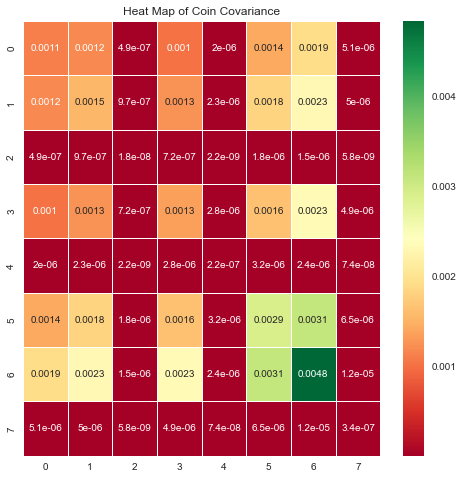

['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'AVAX-USD', 'SHIB-USD', 'DAI-USD']


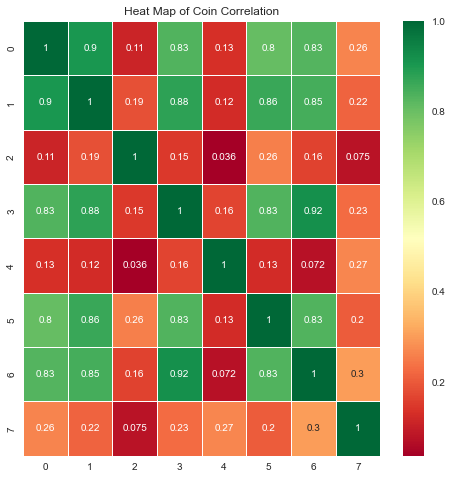

In [6]:
# Takes in cov matrix and returns correlation coeff matrix wz vals e (0, 1)
def correlation_coeffs(cov):
    l = len(cov)
    coeffs = np.zeros((l, l))
    for i in range(l):
        for j in range(l):
            coeffs[i, j] = cov[i, j] / (math.sqrt(cov[i, i]) * math.sqrt(cov[j, j]))
    return coeffs
    
def covariance(coins, start, end):
    # input: coins array, start date, end date
    # output: covariance matrix
    # also prints covariance matrix

    numcoins = len(coins)
    numdays = math.ceil((end - start).days)

    coin_returns = np.zeros((numcoins, numdays))
    for i in range(numcoins):
        data = yf.Ticker(coins[i]).history( interval='1d', start=start , end = end)
        data = np.log(1 + data['Close'].pct_change()).dropna()  # Normalized, interval % return over ~4 months
        coin_returns[i, 0:len(data)] = data

    # Avg returns
    avg_coin_returns = np.zeros(numcoins)
    for coin in range(numcoins):
        sum = 0
        num = 0
        for day in range(numdays):
            retrn = coin_returns[coin, day]
            if retrn != 0:
                sum += retrn
                num += 1
        avg_coin_returns[coin] = sum / num
        # Sample weekly covariances
    cov = np.zeros((numcoins, numcoins))

    for i in range(numcoins):
        for j in range(numcoins):
            sum = 0
            num = 0
            for k in range(numdays):
                xi = coin_returns[i, k]
                yi = coin_returns[j, k]
                # Only calculate covariance at this point if we have data for both asset i and j
                if (xi != 0) and (yi != 0):
                    sum += ( avg_coin_returns[i] - xi ) * ( avg_coin_returns[j] - yi )
                    num += 1
            cov[i, j] = sum / (num-1) # n-1 for sample covariance

    plt.style.use("seaborn")
    print("cov : ",cov)
 
    # 3. Plot correlations heatmap
    plt.figure(figsize=(numcoins,numcoins))
    heat_map = sbn.heatmap( cov, linewidth = 1 , annot = True , cmap = "RdYlGn")
    plt.title( "Heat Map of Coin Covariance" )
    plt.show()
    return cov


start = dt.date(year = 2022, month = 1, day = 1)
end = dt.date.today()
cov = covariance (COINS, start, end)
correlations = correlation_coeffs(cov)
# 3. Plot correlation heatmap
plt.figure(figsize=(len(correlations),len(correlations)))
heat_map = sbn.heatmap( correlations, linewidth = 1 , annot = True , cmap = "RdYlGn")
print(COINS)
plt.title( "Heat Map of Coin Correlation" )
plt.show()

In [ ]:
def z_scores(moving_averages):
  zscores = stats.zscore(moving_averages)
  print(zscores)

z_scores(moving_averages)

In [ ]:
def plot_ratio(token1, token2):
    df1 = moving_average(token1)
    df2 = moving_average(token2)
    times = df1.iloc[:0]
    ratios = []
    for i in range(0, times.len()):
        ratio.append(df1.iloc[:1][i]/df2.iloc[:1][1])
    plt.plot(times, ratios)def trade(zscore, asset1, asset2):
    if zscore > 2:
        print("Buy " +ratio_price(asset1, asset2)+" units of "+asset2)
        print("Sell 1 unit of "+asset1)
    if zscore < -2:
        print("Buy 1 unit of "+asset1)
        print("Sell "+ratio_price(asset1, asset2)+" units of "+asset2)
 


In [ ]:
def graph_ratio(token1, token2):
    mvavg1 = moving_avg(token1)
    mvavg2 = moving_avg(token2)
    ratios = []
    index = 0
    for avg in mvavg1:
        ratios.append(avg/mvavg2[index])
    plt.plot(ratios)
    plt.title('Ratio of ' + token1 + " to " + token2)
